<a href="https://colab.research.google.com/github/J-Weii/yolov8/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [5]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import Image

Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/112.6 GB disk)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pvDO29dM7cTvMP6i0ff9")
project = rf.workspace("school-mys25").project("wood-7ao2p")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to wood-1 in yolov8:: 100%|██████████| 20058/20058 [00:04<00:00, 4311.92it/s] 


In [4]:
dataset.location

'/content/wood-1'

In [5]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolov8n.pt" epochs=50 imgsz=640

100% 6.25M/6.25M [00:00<00:00, 117MB/s]
Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/wood-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

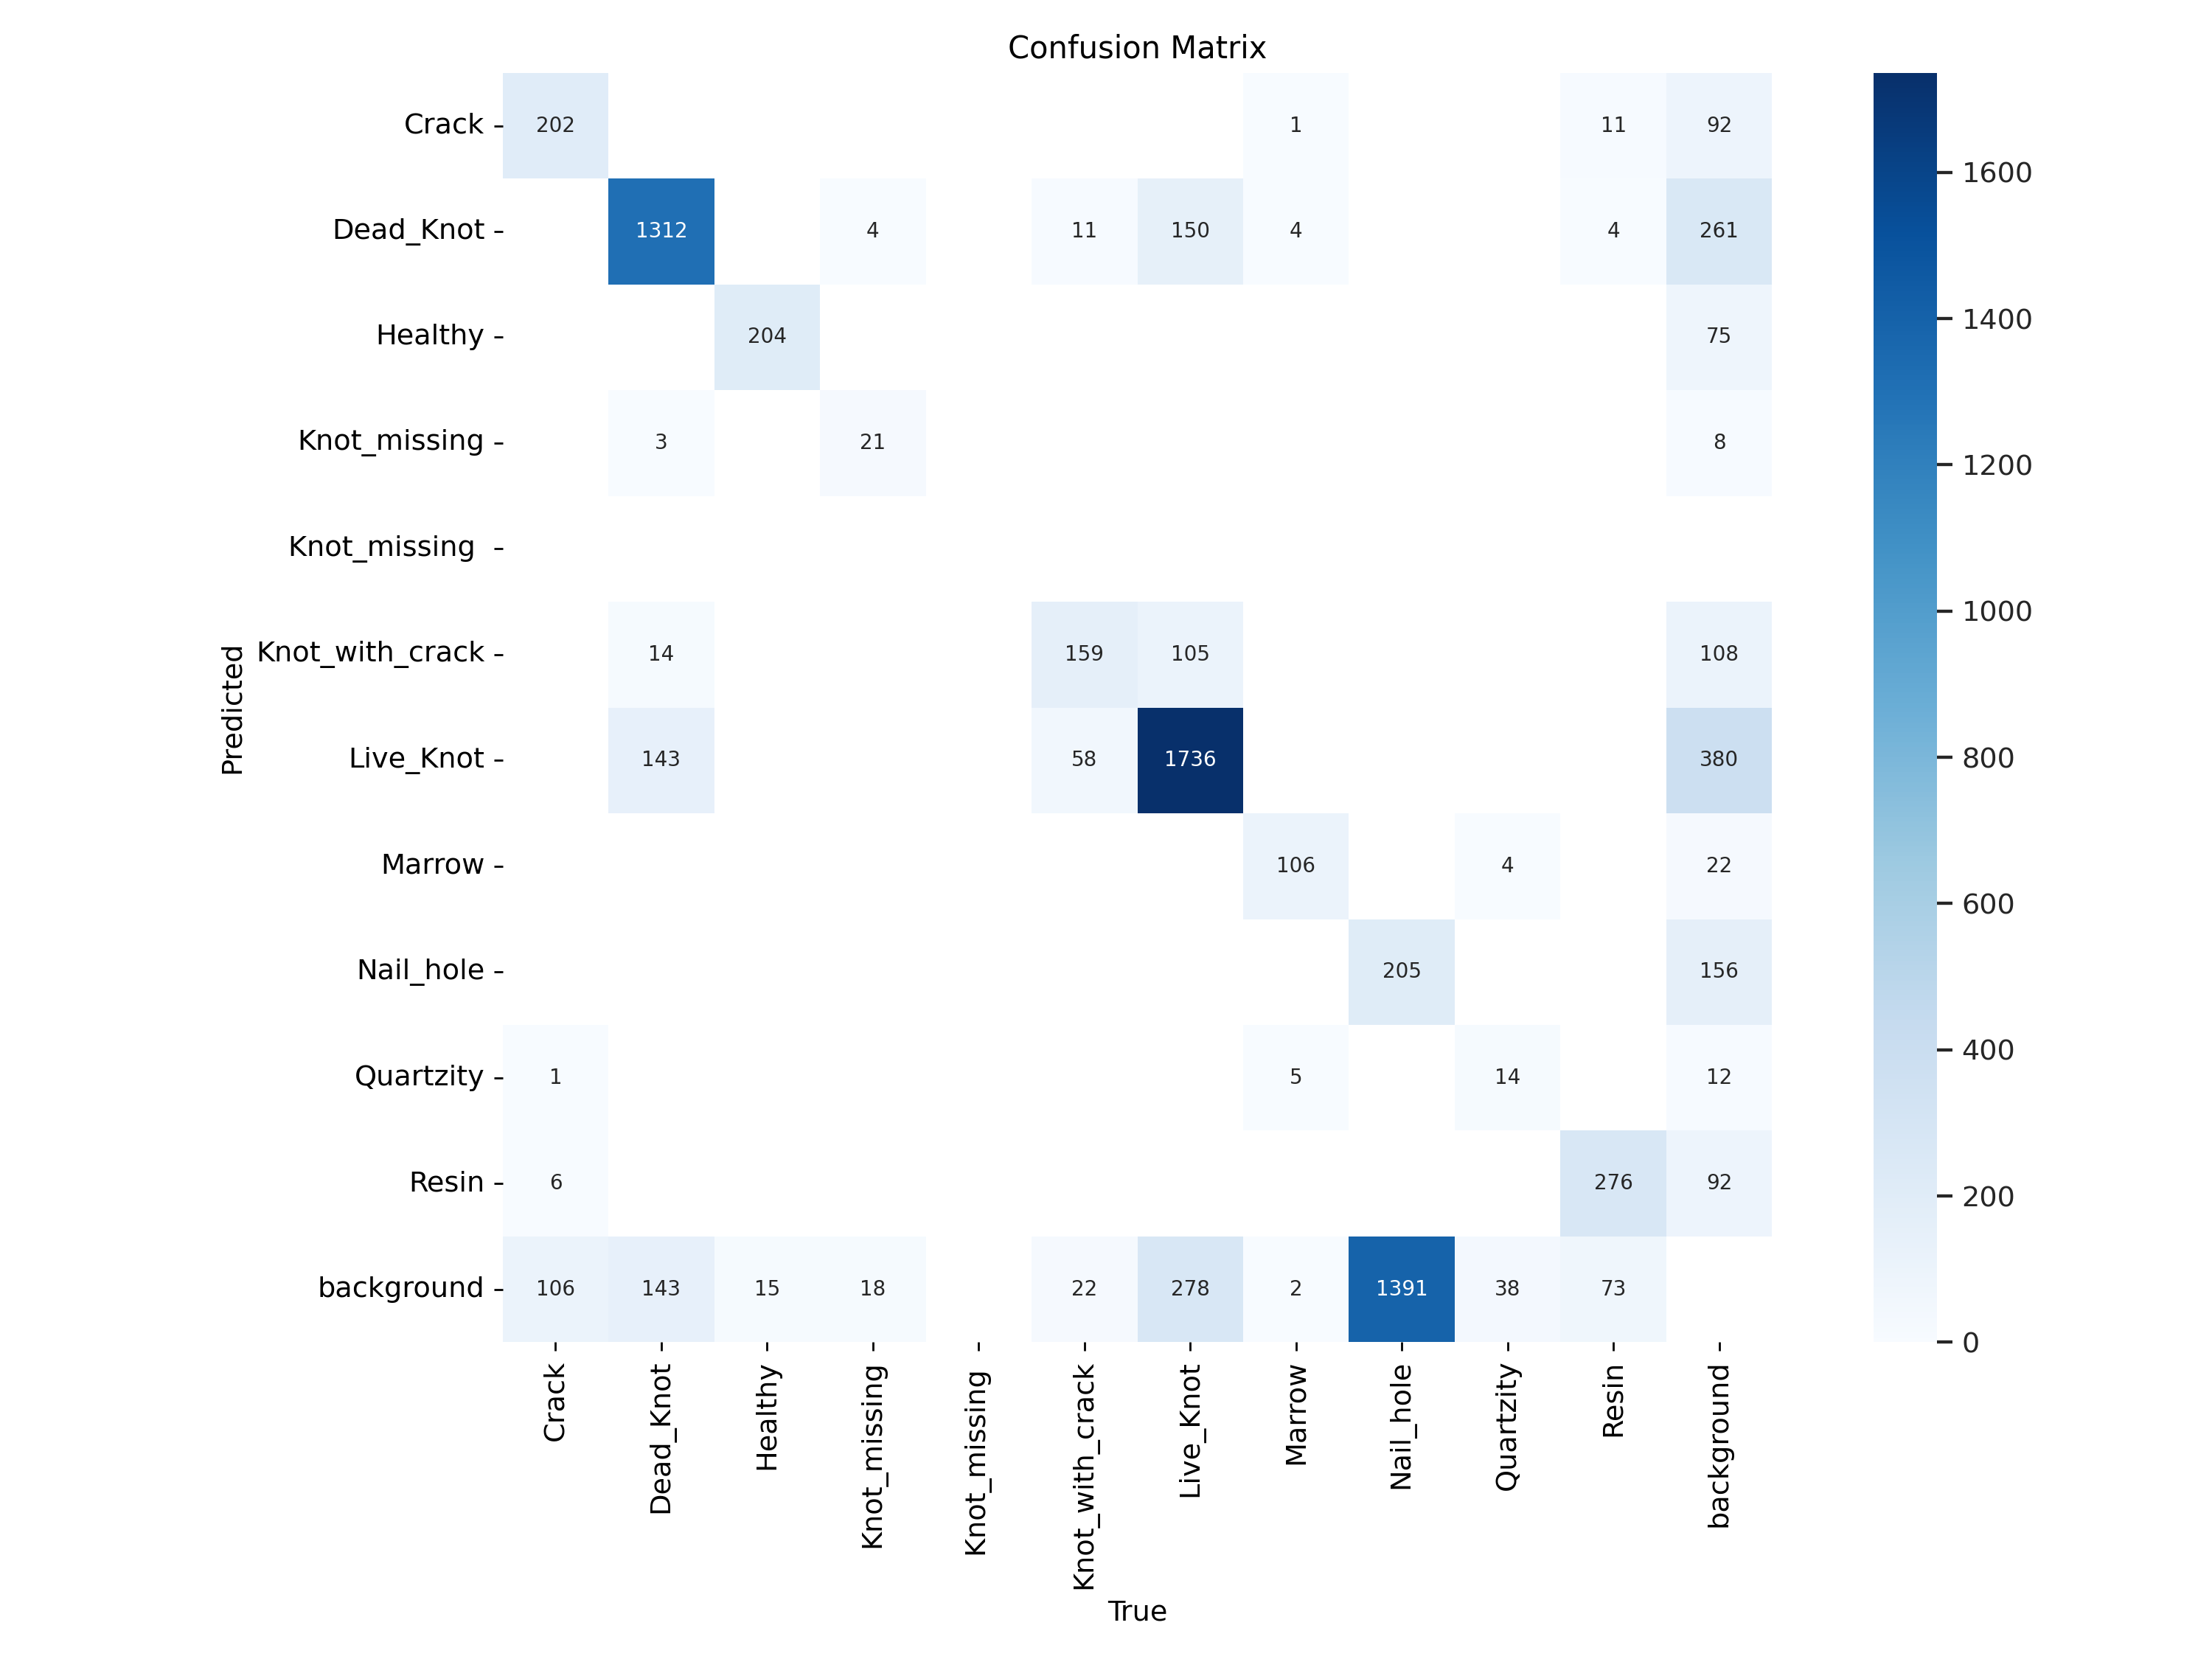

In [7]:
from IPython.display import Image
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

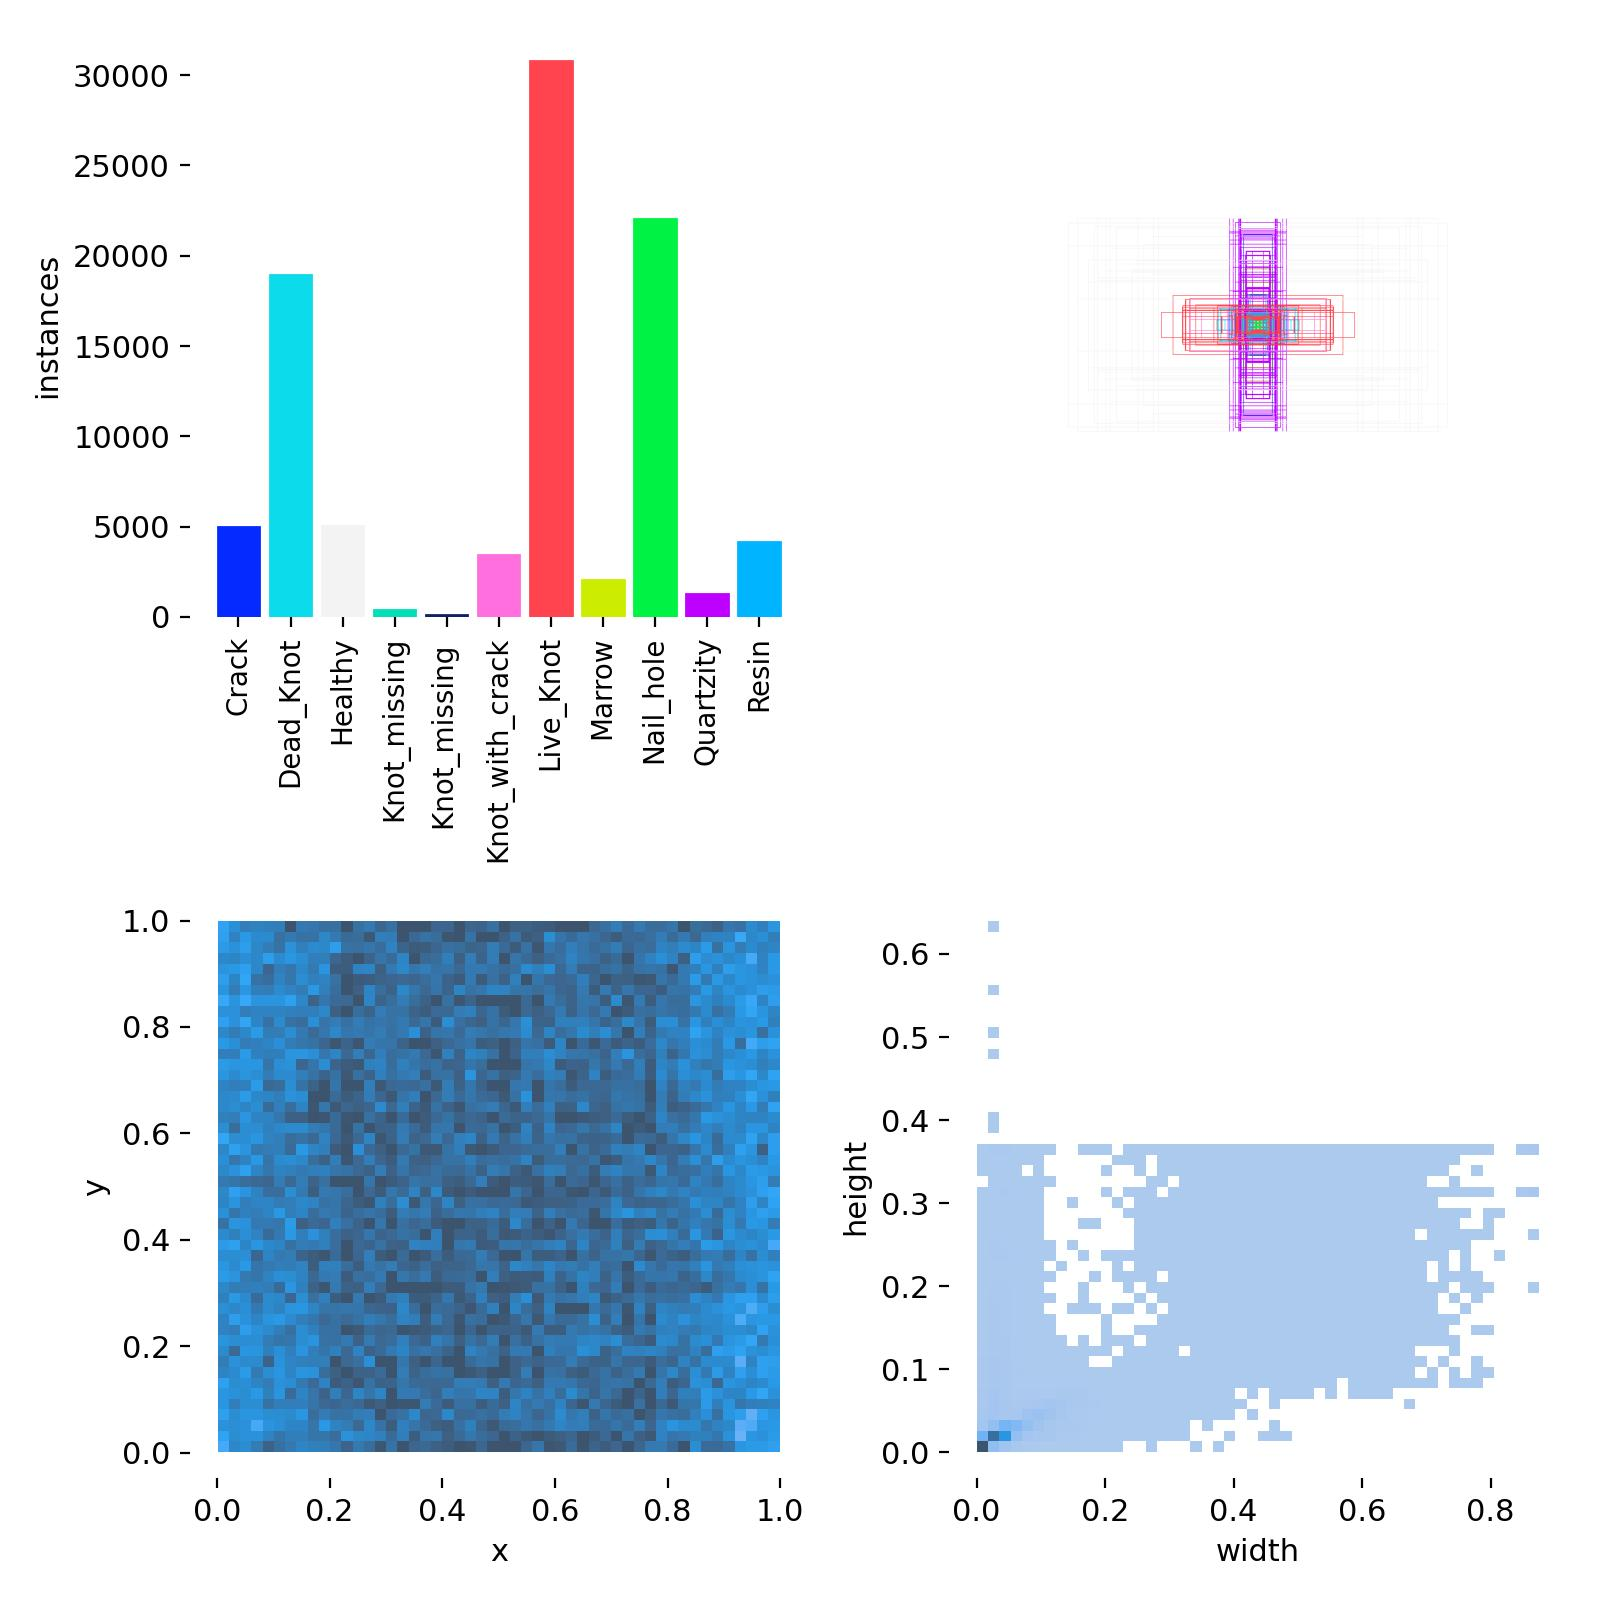

In [12]:
Image("/content/runs/detect/train/labels.jpg", width=600)

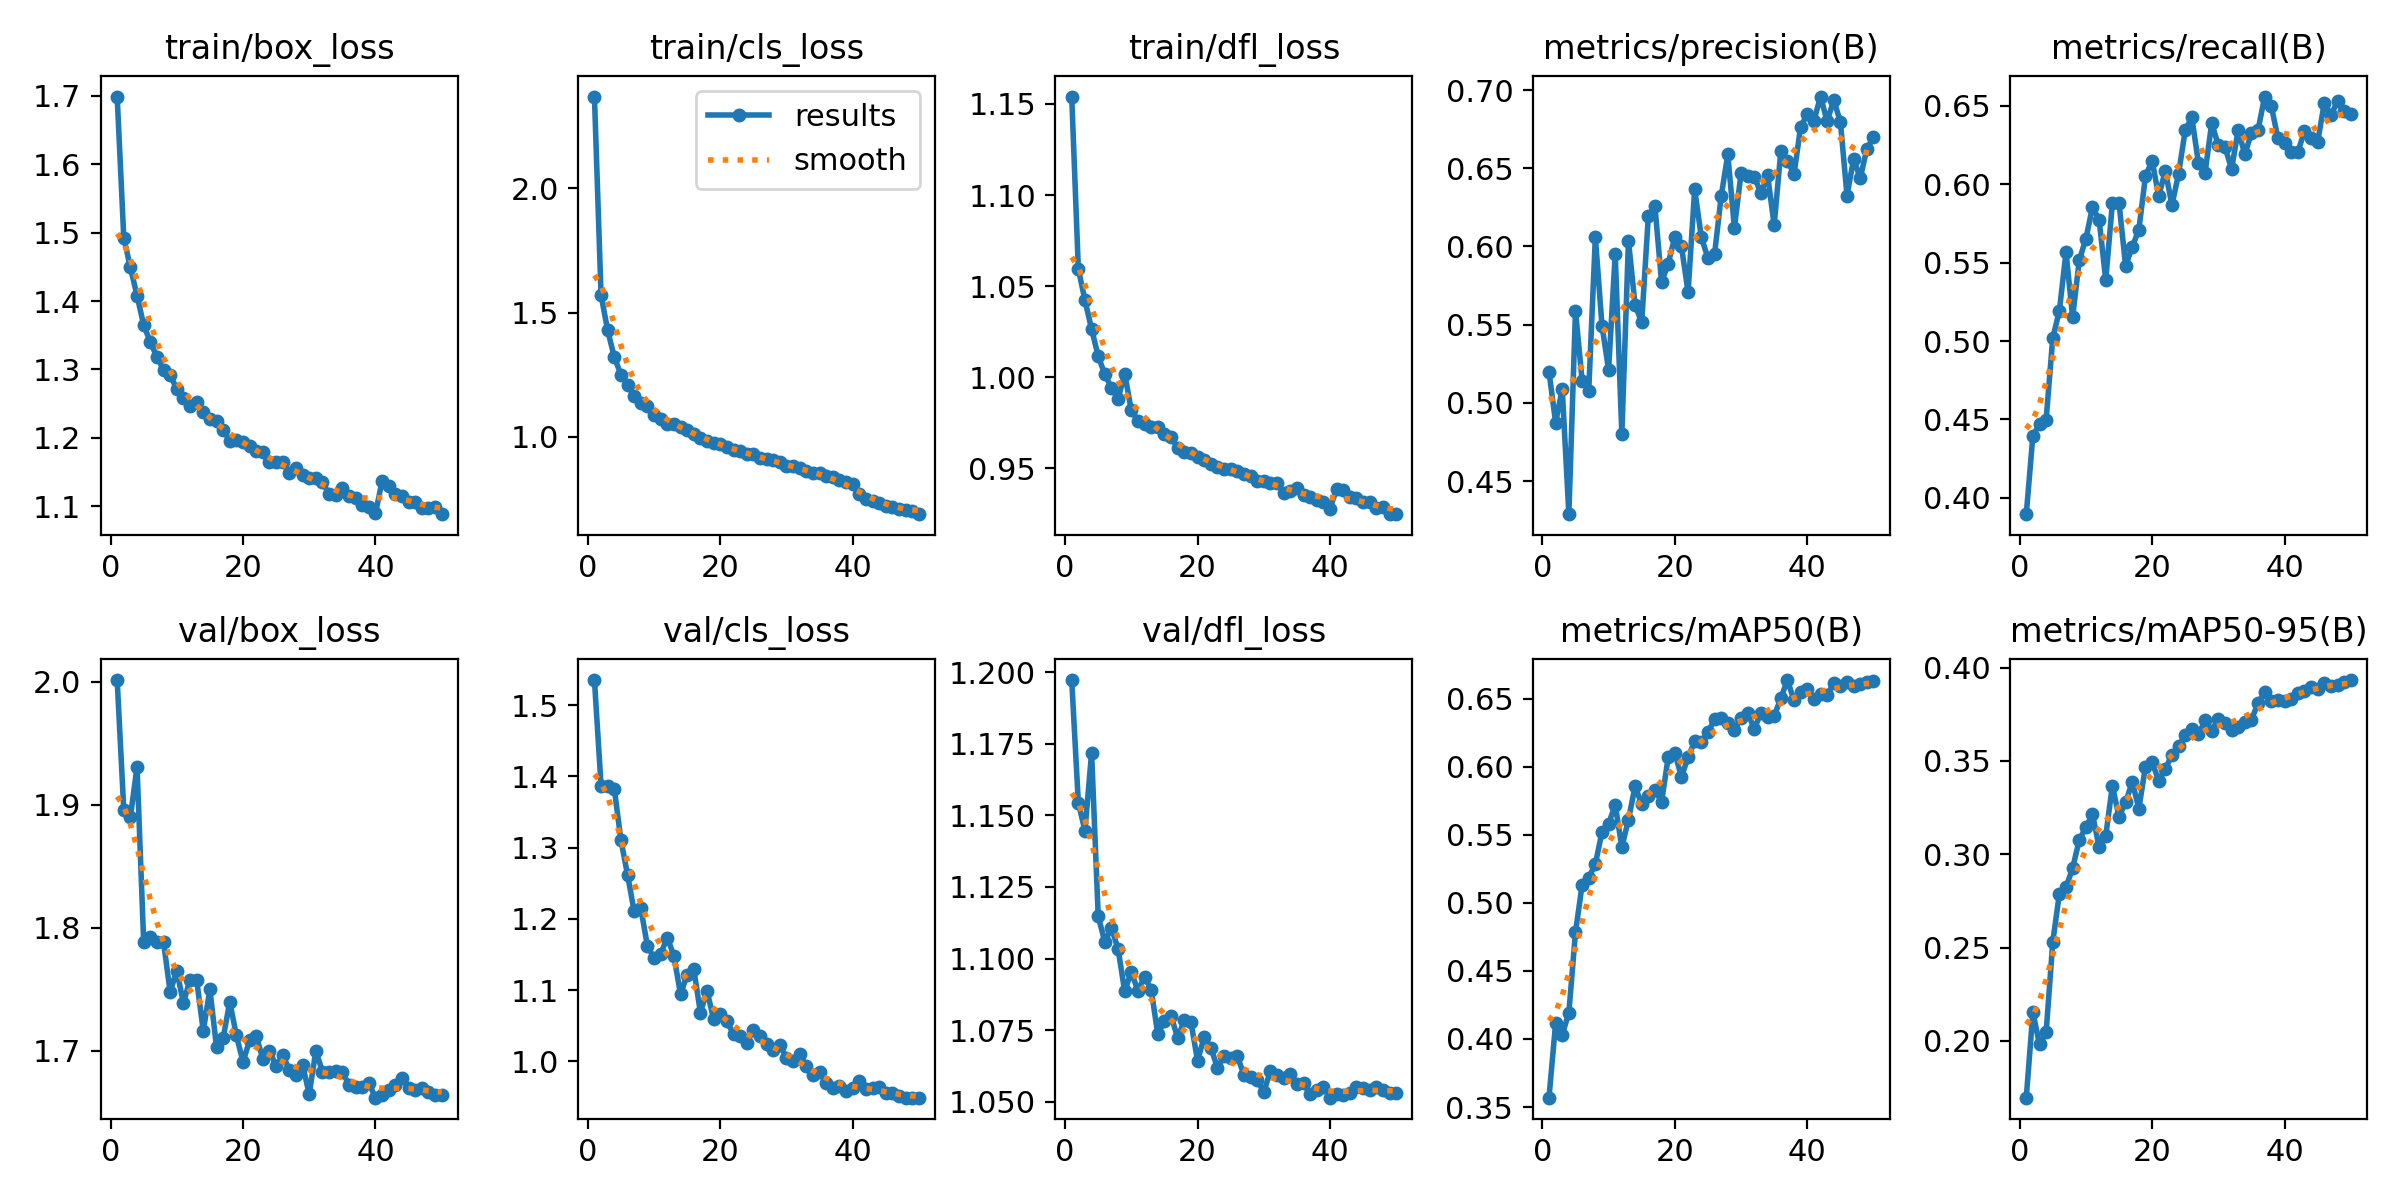

In [13]:
Image("/content/runs/detect/train/results.png", width=600)

In [15]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1347.6±494.5 MB/s, size: 26.4 KB)
val: Scanning /content/wood-1/valid/labels.cache... 836 images, 0 backgrounds, 0 corrupt: 100% 836/836 [00:00<?, ?it/s]
val: /content/wood-1/valid/images/101700075_jpg.rf.98d6f31f90390b9313e6e1d19e6ecf01.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 53/53 [00:12<00:00,  4.27it/s]
                   all        836       6845       0.67      0.647      0.665      0.394
                 Crack         75        315      0.667      0.625      0.659      0.341
             Dead_Knot        386       1615      0.776      0.829      0.849      0.406
               Healthy         73        219      0.738      0.932      0.942      0.942
          Knot_missing         16  

In [16]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs

image 1/418 /content/wood-1/test/images/100000006_jpg.rf.09b17b6ea9cfef9783f31ec6ae3340c7.jpg: 640x640 9 Dead_Knots, 1 Knot_missing, 6 Live_Knots, 13.4ms
image 2/418 /content/wood-1/test/images/100000035_jpg.rf.dba2822a651198c60c0248e0e3ebd2a1.jpg: 640x640 10 Dead_Knots, 2 Live_Knots, 7.5ms
image 3/418 /content/wood-1/test/images/100000044_jpg.rf.448a1898752427e74e6c1c6aa67a20f8.jpg: 640x640 6 Live_Knots, 7.4ms
image 4/418 /content/wood-1/test/images/100000049_jpg.rf.c14b44be5e701b255bd73cf304221fea.jpg: 640x640 6 Live_Knots, 7.4ms
image 5/418 /content/wood-1/test/images/100000052_jpg.rf.a6106fddf786fb59f7463fe99ec481e4.jpg: 640x640 3 Healthys, 7.4ms
image 6/418 /content/wood-1/test/images/100100042_jpg.rf.b25d3d0235921af9208d7463de831feb.jpg: 640x640 3 Live_Knots, 3 Resins, 7.4ms
image 7/418 /content/wood-1/test/images/1001

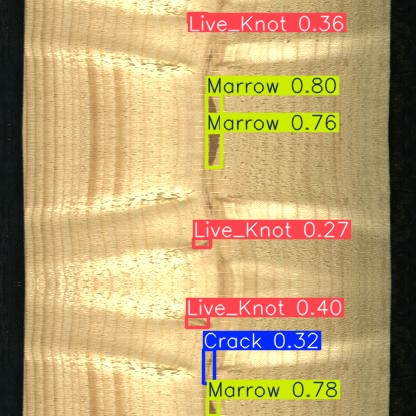

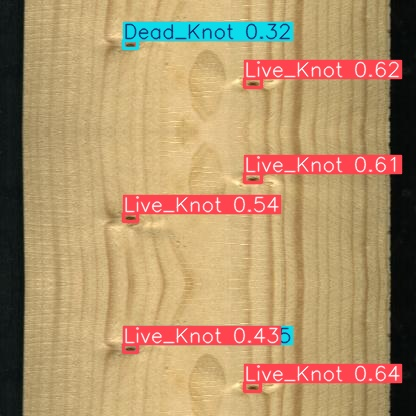

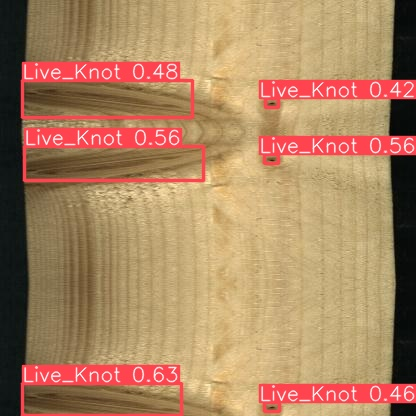

In [17]:
import glob
import os

from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
  display(IPyImage(filename=img, width=600))
  print("\n")